In [41]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [42]:
ames = pd.read_csv('/content/AmesHousing.csv')

In [43]:
# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()

In [44]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

In [45]:
lr_pipeline_1.fit(X,y)
lr_coef=lr_pipeline_1.named_steps["linear_regression"].coef_

handle_unknown is refering to unknown categories

order is just the oder they are in PID is a label not a predictor

In [46]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([-2.59303720e+21, -1.13145211e+19, -7.57138616e+20, -4.47669752e+18,
       -2.55949915e+20])

model is overfit so a bad thing since mdoerate data size but lots predictor tries

ridge regression: use lambda =1/alpha=1

In [51]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(alpha=10))]
)
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')
lr_pipeline_1.fit(X,y)
ridge_coef=lr_pipeline_1.named_steps["ridge_regression"].coef_

In [50]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge())]
)
polyreg = {'ridge_regression__alpha': [.001,.01,.1,1,10]}
gscv = GridSearchCV(lr_pipeline_1, polyreg, cv = 5, scoring='r2')
gscv_fitted = gscv.fit(X, y)

gscv_fitted.cv_results_
lr_pipeline_1.fit(X,y)
ridge1_coef=lr_pipeline_1.named_steps["ridge_regression"].coef_

In [9]:
pd.DataFrame(data = {"alpha": [.001,.01,.1,1,10], "scores": gscv_fitted.cv_results_['mean_test_score']})

,alpha,scores
0,0.001,0.853920
1,0.010,0.854186
2,0.100,0.856302
3,1.000,0.861932
4,10.000,0.864272


Lasso

In [10]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso", Lasso())]
)
polyreg = {'lasso__alpha': [.001,.01,.1,1,10]}
gscv = GridSearchCV(lr_pipeline_1, polyreg, cv = 5, scoring='r2')
gscv_fitted = gscv.fit(X, y)

gscv_fitted.cv_results_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+11, tolerance: 1.463e

{'mean_fit_time': array([0.93970237, 1.63555975, 0.88594508, 1.30740323, 0.29462757]),
 'std_fit_time': array([0.03679628, 1.18863768, 0.09112656, 0.74142189, 0.10608268]),
 'mean_score_time': array([0.03212948, 0.03866673, 0.02852964, 0.04382124, 0.03279095]),
 'std_score_time': array([0.00447504, 0.01993871, 0.00262424, 0.01575666, 0.00967499]),
 'param_lasso__alpha': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'lasso__alpha': 0.001},
  {'lasso__alpha': 0.01},
  {'lasso__alpha': 0.1},
  {'lasso__alpha': 1},
  {'lasso__alpha': 10}],
 'split0_test_score': array([0.8972019 , 0.89720561, 0.89725821, 0.89774385, 0.90077569]),
 'split1_test_score': array([0.9103958 , 0.91040134, 0.91045103, 0.91093785, 0.91506699]),
 'split2_test_score': array([0.79032004, 0.79085941, 0.79595065, 0.79691806, 0.80141962]),
 'split3_test_score': array([0.77402031, 0.77406031, 0.77407171, 0.77426245, 0.7766491

In [11]:
pd.DataFrame(data = {"alpha": [.001,.01,.1,1,10], "scores": gscv_fitted.cv_results_['mean_test_score']})

,alpha,scores
0,0.001,0.855499
1,0.010,0.855606
2,0.100,0.856618
3,1.000,0.857152
4,10.000,0.860632


In [53]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso", Lasso(alpha=10))]
)

gscv_fitted = gscv.fit(X, y)

gscv_fitted.cv_results_
lr_pipeline_1.fit(X,y)
lasso_coef=lr_pipeline_1.named_steps["lasso"].coef_

pratice activity

In [12]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic", ElasticNet())]
)
polyreg = {'elastic__alpha': [.001,.01,.1,1,10],
           'elastic__l1_ratio': [.001,.01,.1,1,10]}
gscv = GridSearchCV(lr_pipeline_1, polyreg, cv = 5, scoring='r2')
gscv_fitted = gscv.fit(X, y)

gscv_fitted.cv_results_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.516e+11, tolerance: 1.348e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.310e+11, tolerance: 1.474e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.147e+11, tolerance: 1.463e

{'mean_fit_time': array([1.41253724, 0.85727105, 2.0346137 , 0.94566164, 0.05431895,
        1.31531677, 0.71828241, 0.66090441, 1.55715652, 0.05660214,
        0.22758255, 0.20400362, 0.17557664, 1.54930449, 0.05095119,
        0.13083396, 0.13895116, 0.11937928, 0.78041902, 0.05778189,
        0.11513929, 0.11510329, 0.12190042, 0.64603343, 0.07239089]),
 'std_fit_time': array([0.73483766, 0.1064759 , 1.50534052, 0.06984626, 0.02951042,
        0.61688049, 0.01470275, 0.02628492, 0.78332009, 0.02949323,
        0.02697583, 0.01293363, 0.01382499, 1.35198591, 0.01367467,
        0.02867222, 0.01310509, 0.00638547, 0.11243004, 0.03737034,
        0.0295564 , 0.01566464, 0.00831525, 0.23536759, 0.01684916]),
 'mean_score_time': array([0.03424926, 0.03541942, 0.04101877, 0.02968864, 0.        ,
        0.04166999, 0.03219867, 0.0295248 , 0.03673563, 0.        ,
        0.03351851, 0.02808933, 0.03167505, 0.03437514, 0.        ,
        0.02863231, 0.02961769, 0.02851768, 0.02840242, 0.  

In [16]:
gscv_fitted.cv_results_['mean_test_score']

array([0.86319111, 0.86318012, 0.86306078, 0.85549892,        nan,
       0.8636882 , 0.86370319, 0.86384771, 0.85560578,        nan,
       0.85163846, 0.85171796, 0.8525391 , 0.85661828,        nan,
       0.81216764, 0.81248905, 0.81571562, 0.85715222,        nan,
       0.53650303, 0.53855695, 0.55986393, 0.86063224,        nan])

In [15]:
gscv_fitted.cv_results_['params']
params_df = pd.DataFrame(gscv_fitted.cv_results_['params'])
results_df = params_df.assign(scores=gscv_fitted.cv_results_['mean_test_score'])
results_df.sort_values(by='scores', ascending=False)

,elastic__alpha,elastic__l1_ratio,scores
7,0.010,0.100,0.863848
6,0.010,0.010,0.863703
5,0.010,0.001,0.863688
0,0.001,0.001,0.863191
1,0.001,0.010,0.863180
2,0.001,0.100,0.863061
23,10.000,1.000,0.860632
18,1.000,1.000,0.857152
13,0.100,1.000,0.856618
8,0.010,1.000,0.855606


In [32]:
final_pipeline = Pipeline(
  [("preprocessing", ct),
  ("elastic", ElasticNet(alpha=.01, l1_ratio=.1))]
)

final_pipeline.fit(X,y)
elastic_coef=final_pipeline.named_steps["elastic"].coef_

In [54]:
df_coefs=pd.DataFrame({
    "Ridge": ridge_coef,
    "Lasso": lasso_coef,
    "Elastic": elastic_coef,
    "Linear": lr_coef
}).melt(var_name="Model", value_name="Coefficient")


In [55]:
from plotnine import *

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 503 rows containing non-finite values.


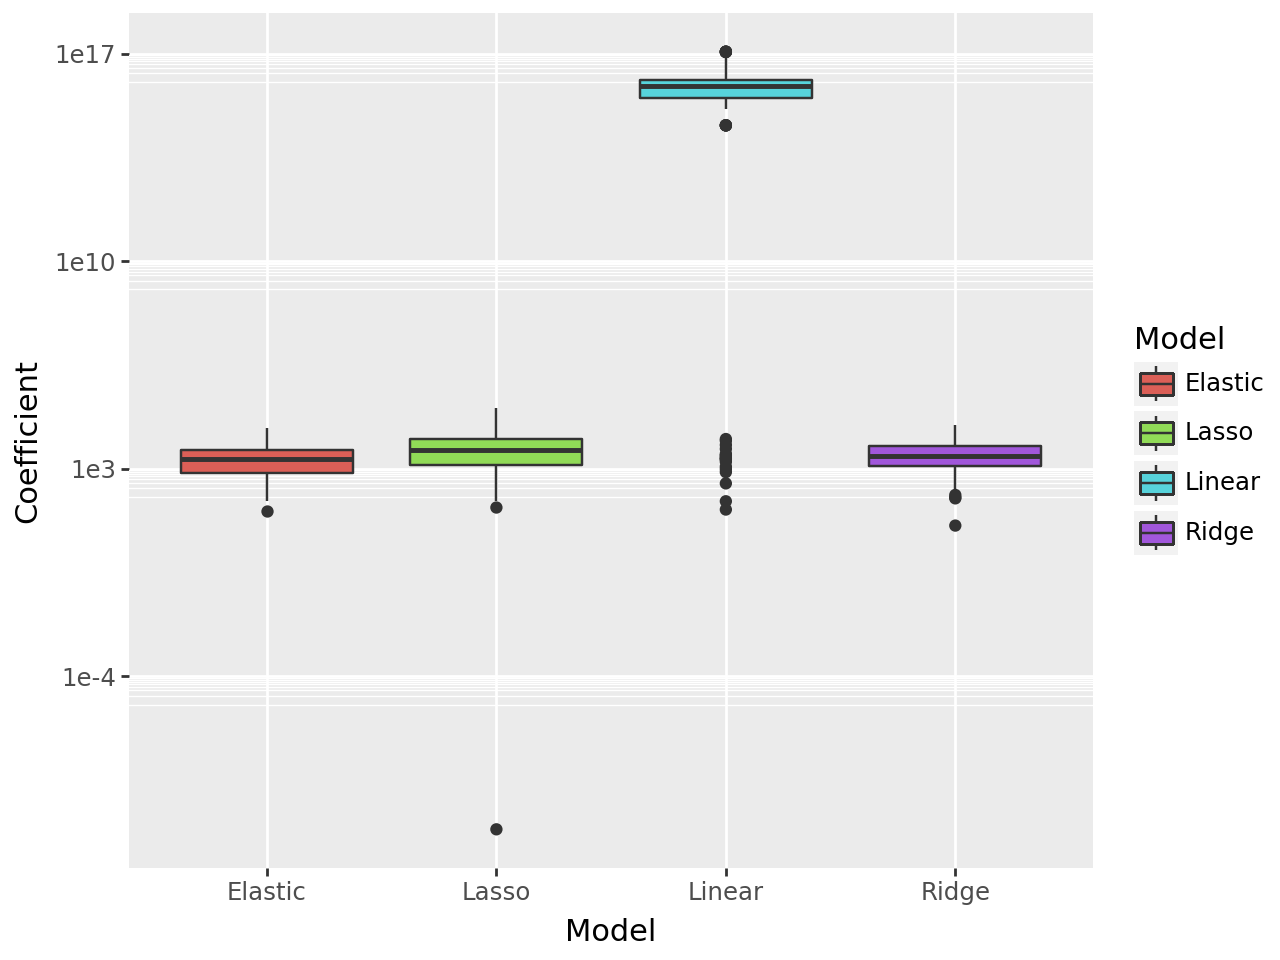

In [56]:
(ggplot(df_coefs, aes(x="Model", y="Coefficient", fill="Model"))
 + geom_boxplot()
 +scale_y_log10())